<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/SPMF_algoComparision_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install spmf

In [33]:
from spmf import Spmf
import pathlib

In [34]:
d = '/content/' #specify the folder all the input and output files are
input_filename = "/content/breast_train_transactions_rpgrowth.txt"
data = "Breast_Cancer"

ECLAT

In [35]:
spmf_eclat = Spmf("Eclat", input_filename=input_filename,
            output_filename="output_eclat", arguments=[0.01],spmf_bin_location_dir=d )

In [36]:
spmf_eclat.run()

>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 240
 Frequent itemsets count : 20146
 Total time ~ 151 ms
 Maximum memory usage : 12.267608642578125 mb



Apriori

In [37]:
spmf_apriori = Spmf("Apriori", input_filename=input_filename,
            output_filename="output_apriori", arguments=[0.01],spmf_bin_location_dir=d )

In [38]:
spmf_apriori.run()

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 23464
 The algorithm stopped at size 10
 Frequent itemsets count : 19832
 Maximum memory usage : 10.020225524902344 mb
 Total time ~ 1213 ms



FP-Growth

In [39]:
spmf_fpgrowth = Spmf("FPGrowth_itemsets", input_filename=input_filename,
            output_filename="output_FP-Growth", arguments=[0.01],spmf_bin_location_dir=d )

In [40]:
spmf_fpgrowth.run()

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 240
 Max memory usage: 13.275436401367188 mb 
 Frequent itemsets count : 20146
 Total time ~ 184 ms



RunTime

In [41]:
#Apriori
min_sup = [.01, .02,.03,.04, .05,.06,.07,.08,.09, .1, .2, .5, .6]
import time
run_time_apr = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_apriori = Spmf("Apriori", input_filename=input_filename,
            output_filename="output_apriori", arguments=[i],spmf_bin_location_dir=d )
    spmf_apriori.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_apr.append(time.time() - start_time)
  
run_time_apr

0.01
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 23464
 The algorithm stopped at size 10
 Frequent itemsets count : 19832
 Maximum memory usage : 8.097320556640625 mb
 Total time ~ 1022 ms

For 0--- 1.2809579372406006 seconds ---
0.02
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 12026
 The algorithm stopped at size 10
 Frequent itemsets count : 9360
 Maximum memory usage : 9.29736328125 mb
 Total time ~ 512 ms

For 0--- 0.7720694541931152 seconds ---
0.03
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 6220
 The algorithm stopped at size 9
 Frequent itemsets count : 4615
 Maximum memory usage : 9.29736328125 mb
 Total time ~ 804 ms

For 0--- 1.0592164993286133 seconds ---
0.04
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 4604
 The algorithm stopped at size 9
 Frequent itemsets count : 3270
 Maximum memory usage : 8.897285461425781 mb


[1.2809967994689941,
 0.7721083164215088,
 1.0592718124389648,
 1.2813589572906494,
 0.5319242477416992,
 0.586235523223877,
 0.9336764812469482,
 0.3644883632659912,
 0.5297055244445801,
 0.5381026268005371,
 0.301438570022583,
 0.2729644775390625,
 0.35884523391723633]

In [42]:
#EClat

import time
run_time_eclat = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_eclat = Spmf("Eclat", input_filename=input_filename,
            output_filename="output_Eclat", arguments=[i],spmf_bin_location_dir=d )
    spmf_eclat.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_eclat.append(time.time() - start_time)
  
run_time_eclat

0.01
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 240
 Frequent itemsets count : 20146
 Total time ~ 155 ms
 Maximum memory usage : 12.271530151367188 mb

For 0--- 0.4352302551269531 seconds ---
0.02
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 240
 Frequent itemsets count : 9489
 Total time ~ 118 ms
 Maximum memory usage : 10.6953125 mb

For 0--- 0.3958241939544678 seconds ---
0.03
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 240
 Frequent itemsets count : 4693
 Total time ~ 93 ms
 Maximum memory usage : 10.6953125 mb

For 0--- 0.4802558422088623 seconds ---
0.04
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 240
 Frequent itemsets count : 3313
 Total time ~ 88 ms
 Maximum memory usage : 10.6953125 mb

For 0--- 0.45862388610839844 seconds ---


[0.43526530265808105,
 0.39586544036865234,
 0.48029470443725586,
 0.4586665630340576,
 0.337540864944458,
 0.32273435592651367,
 0.3301231861114502,
 0.33763837814331055,
 0.32862210273742676,
 0.3147408962249756,
 0.3805406093597412,
 0.3633565902709961,
 0.2879610061645508]

In [43]:
#fp-grwoth

import time
run_time_fp = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_fp = Spmf("FPGrowth_itemsets", input_filename=input_filename,
            output_filename="output_fp", arguments=[i],spmf_bin_location_dir=d )
    spmf_fp.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_fp.append(time.time() - start_time)
  
run_time_fp

0.01
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 240
 Max memory usage: 13.765655517578125 mb 
 Frequent itemsets count : 20146
 Total time ~ 194 ms

For 0--- 0.45909547805786133 seconds ---
0.02
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 240
 Max memory usage: 7.2598114013671875 mb 
 Frequent itemsets count : 9489
 Total time ~ 141 ms

For 0--- 0.3818068504333496 seconds ---
0.03
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 240
 Max memory usage: 6.507225036621094 mb 
 Frequent itemsets count : 4693
 Total time ~ 127 ms

For 0--- 0.3975565433502197 seconds ---
0.04
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 240
 Max memory usage: 6.507225036621094 mb 
 Frequent itemsets count : 3313
 Total time ~ 102 ms

For 0--- 0.3674602508544922 seco

[0.4591250419616699,
 0.3818492889404297,
 0.39760494232177734,
 0.36750245094299316,
 0.35492563247680664,
 0.33977270126342773,
 0.3259584903717041,
 0.4186272621154785,
 0.3471858501434326,
 0.332714319229126,
 0.29079604148864746,
 0.37613344192504883,
 0.2784895896911621]

In [44]:
#plot it
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
df = pd.DataFrame({'Fp_Growth': run_time_fp, 'Apriori' :run_time_apr, 'ECLAT' :run_time_eclat })

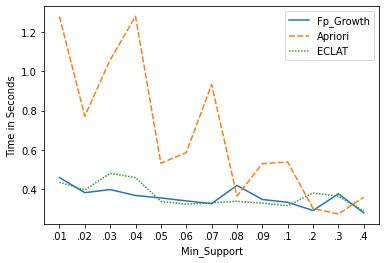

In [46]:
g = sns.lineplot(data=df)
g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels(['.01','.02', '.03','.04','.05','.06', '.07','.08','.09', '.1', '.2','.3','.4', '.5', '.6'])
g.set(xlabel='Min_Support', ylabel='Time in Seconds')
plt.savefig(data+"_"+"Run time performance.png")